|                |   |
:----------------|---|
| **Nombre**     |Christopher Jacob Ahumada Robles   |
| **Fecha**      |06/02/2025   |
| **Expediente*.*           | 748077  |

In [20]:
import numpy as np

In [8]:
import pandas as pd
df=pd.read_excel("Boston Housing Dataset 1978.xlsx")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [40]:
df_2=df.dropna()
df_2.shape

(452, 14)

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

y = df_2["MEDV"].values.reshape(-1, 1)  
n = len(y)
variables = [np.reshape(df_2[col], [-1, 1]) for col in df.columns[:-1]]

ones = np.ones([n, 1])
X = np.hstack([ones] + variables[:13]) 

# Ajustar el modelo
ols = sm.OLS(y, X)
ols_results = ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     96.16
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          2.64e-119
Time:                        16:54:24   Log-Likelihood:                -1319.4
No. Observations:                 452   AIC:                             2667.
Df Residuals:                     438   BIC:                             2724.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8664      5.477      3.810      0.000      10.102      31.631
x1            -0.2380      0.224     -1.063      0.288      -0.678       0.202
x2             0.0382      0.013      2.858      0.004       0.012       0.065
x3             0.0514      0.060      0.861      0.390      -0.066       0.169
x4             2.4350      0.830      2.935      0.004       0.804       4.066
x5           -11.6580      3.928     -2.968      0.003     -19.378      -3.938
x6             5.1102      0.455     11.235      0.000       4.216       6.004
x7            -0.0061      0.013     -0.465      0.642      -0.032       0.020
x8            -1.2715      0.196     -6.495      0.000      -1.656      -0.887
x9             0.2944      0.085      3.448      0.001       0.127       0.462
x10           -0.0114      0.004     -3.145      0.002      -0.018      -0.004
x11           -0.8310      0.127     -6.544      0.000      -1.081      -0.581
x12            0.0123      0.004      3.505      0.001       0.005       0.019
x13           -0.5208      0.057     -9.068      0.000      -0.634      -0.408
==============================================================================
Omnibus:                      203.769   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1595.387
Skew:                           1.762   Prob(JB):                         0.00
Kurtosis:                      11.502   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
df_2=df_2.drop(columns = ["AGE","INDUS","CRIM"])
df_2

,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.0,0.0,0.538,6.575,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.0,0.0,0.469,6.421,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.0,0.0,0.469,7.185,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.0,0.0,0.458,6.998,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.0,0.0,0.458,7.147,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0.0,0.573,6.593,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.0,0.0,0.573,6.120,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.0,0.0,0.573,6.976,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.0,0.0,0.573,6.794,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

y = df_2["MEDV"].values  
n = len(y)
x_df = df_2.iloc[:, :-1].values

ones = np.ones([n, 1])
X = np.hstack((ones, x_df)) 

# Ajustar el modelo
ols = sm.OLS(y, X)
ols_results = ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     125.1
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          5.61e-122
Time:                        17:06:24   Log-Likelihood:                -1320.5
No. Observations:                 452   AIC:                             2663.
Df Residuals:                     441   BIC:                             2708.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6793      5.381      4.029      0.000      11.104      32.255
x1             0.0363      0.013      2.768      0.006       0.011       0.062
x2             2.5254      0.823      3.069      0.002       0.908       4.142
x3           -12.0975      3.583     -3.377      0.001     -19.139      -5.056
x4             4.9887      0.437     11.412      0.000       4.130       5.848
x5            -1.2719      0.183     -6.941      0.000      -1.632      -0.912
x6             0.2223      0.061      3.621      0.000       0.102       0.343
x7            -0.0101      0.003     -3.104      0.002      -0.017      -0.004
x8            -0.8204      0.125     -6.543      0.000      -1.067      -0.574
x9             0.0126      0.003      3.633      0.000       0.006       0.019
x10           -0.5378      0.052    -10.415      0.000      -0.639      -0.436
==============================================================================
Omnibus:                      191.541   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1335.191
Skew:                           1.674   Prob(JB):                    1.17e-290
Kurtosis:                      10.726   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

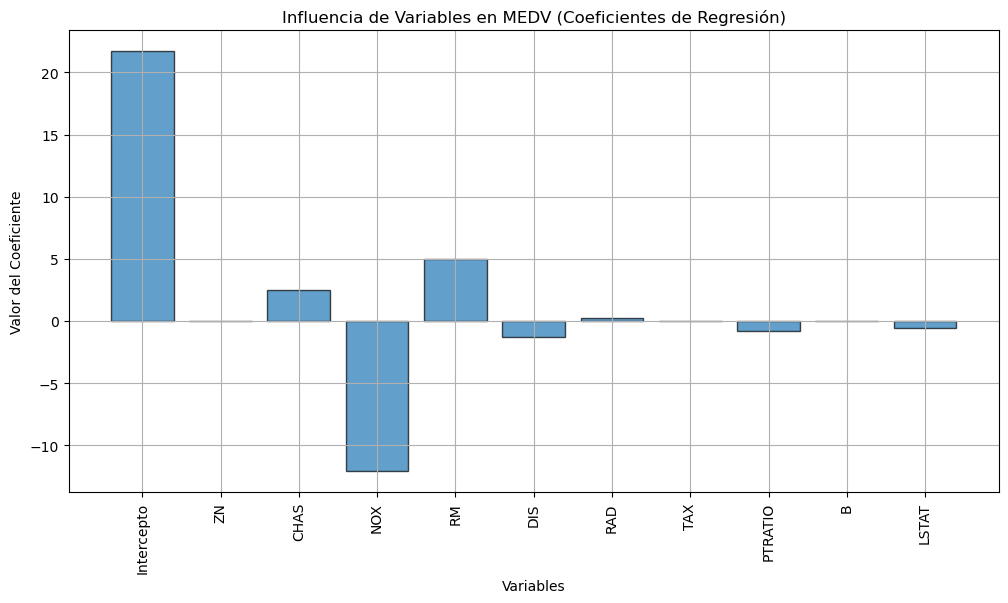

In [87]:
# Obtener los coeficientes
coefficients = ols_results.params

# Crear etiquetas para los coeficientes
labels = ['Intercepto'] + df_2.columns[:-1].tolist()

# Crear el histograma de los coeficientes
plt.figure(figsize=(12, 6))
plt.bar(labels, coefficients, edgecolor='k', alpha=0.7)
plt.title('Influencia de Variables en MEDV (Coeficientes de Regresión)')
plt.xlabel('Variables')
plt.ylabel('Valor del Coeficiente')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

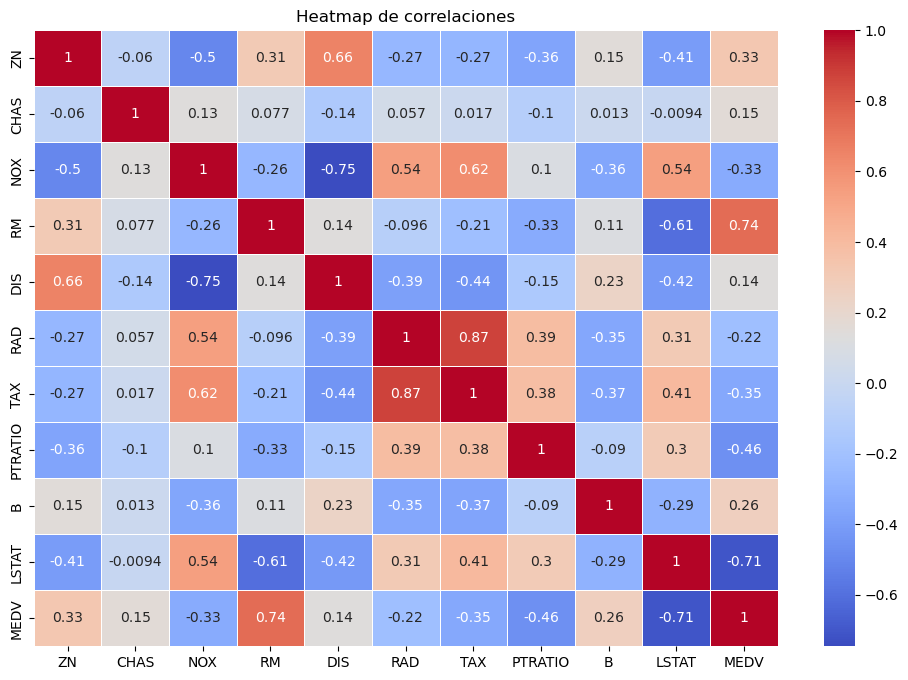

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12, 8))
sns.heatmap(df_2.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap de correlaciones")
plt.show()

In [77]:
df_2["RM"].mean()

6.343537610619469

In [85]:
df_2["TAX"].mean()

377.4424778761062

# Necesitamos pasar los datos a distribucion z para poder comprar las variables entre si y no 1:1

In [104]:
df_2.head()

,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.0,0.0,0.538,6.575,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.0,0.0,0.469,6.421,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.0,0.0,0.469,7.185,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.0,0.0,0.458,6.998,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.0,0.0,0.458,7.147,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [100]:
df_scaled = df_2.copy()
for col in df_2.columns[:-1]:
    min_val = df_2[col].min()
    max_val = df_2[col].max()
    df_scaled[col] = (df_2[col] - min_val) / (max_val - min_val)
ones = np.ones([n, 1])
X_scaled = np.hstack((ones, df_scaled.iloc[:, :-1].values))
ols = sm.OLS(y, X_scaled)
ols_results = ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     125.1
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          5.61e-122
Time:                        17:31:37   Log-Likelihood:                -1320.5
No. Observations:                 452   AIC:                             2663.
Df Residuals:                     441   BIC:                             2708.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4156      2.569      7.948      0.000      15.367      25.464
x1             3.6260      1.310      2.768      0.006       1.051       6.201
x2             2.5254      0.823      3.069      0.002       0.908       4.142
x3            -5.8794      1.741     -3.377      0.001      -9.301      -2.457
x4            26.0361      2.282     11.412      0.000      21.552      30.520
x5           -13.9868      2.015     -6.941      0.000     -17.947     -10.027
x6             5.1134      1.412      3.621      0.000       2.338       7.888
x7            -5.3038      1.709     -3.104      0.002      -8.662      -1.945
x8            -7.7120      1.179     -6.543      0.000     -10.028      -5.396
x9             4.9961      1.375      3.633      0.000       2.293       7.699
x10          -17.5763      1.688    -10.415      0.000     -20.893     -14.260
==============================================================================
Omnibus:                      191.541   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1335.191
Skew:                           1.674   Prob(JB):                    1.17e-290
Kurtosis:                      10.726   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
df_scaled

,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.18,0.0,0.314815,0.577505,0.269203,0.000000,0.208015,0.287234,1.000000,0.099449,24.0
1,0.00,0.0,0.172840,0.547998,0.348962,0.043478,0.104962,0.553191,1.000000,0.226744,21.6
2,0.00,0.0,0.172840,0.694386,0.348962,0.043478,0.104962,0.553191,0.989737,0.070379,34.7
3,0.00,0.0,0.150206,0.658555,0.448545,0.086957,0.066794,0.648936,0.994276,0.037026,33.4
4,0.00,0.0,0.150206,0.687105,0.448545,0.086957,0.066794,0.648936,1.000000,0.110159,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.00,0.0,0.386831,0.580954,0.122671,0.000000,0.164122,0.893617,0.987619,0.242962,22.4
502,0.00,0.0,0.386831,0.490324,0.105293,0.000000,0.164122,0.893617,1.000000,0.224908,20.6
503,0.00,0.0,0.386831,0.654340,0.094381,0.000000,0.164122,0.893617,1.000000,0.119645,23.9
504,0.00,0.0,0.386831,0.619467,0.114514,0.000000,0.164122,0.893617,0.991301,0.145349,22.0


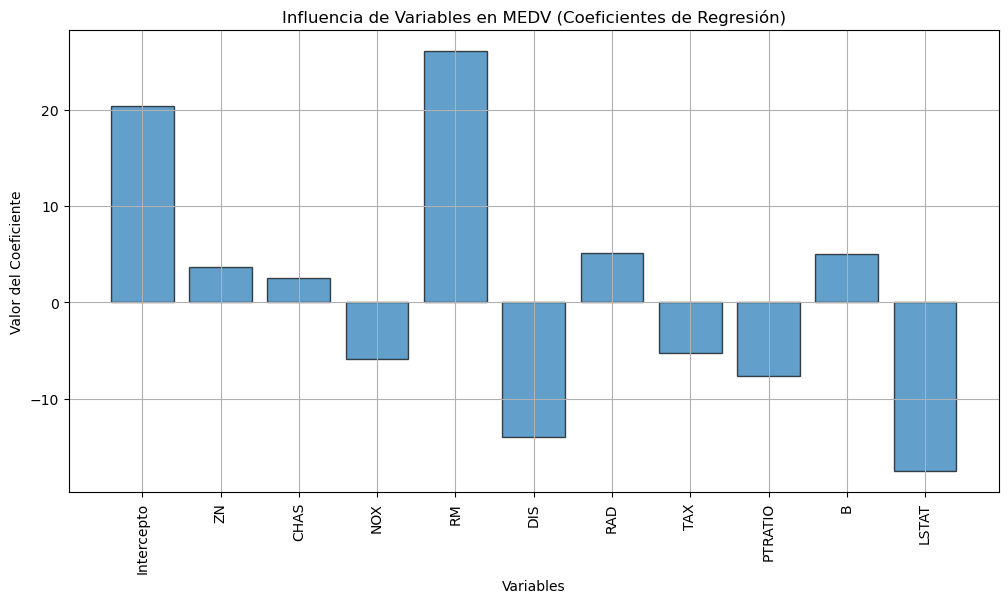

In [108]:
# Obtener los coeficientes
coefficients = ols_results.params

# Crear etiquetas para los coeficientes
labels = ['Intercepto'] + df_scaled.columns[:-1].tolist()

# Crear el histograma de los coeficientes
plt.figure(figsize=(12, 6))
plt.bar(labels, coefficients, edgecolor='k', alpha=0.7)
plt.title('Influencia de Variables en MEDV (Coeficientes de Regresión)')
plt.xlabel('Variables')
plt.ylabel('Valor del Coeficiente')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()